### 1) Using KMeans from Sklearn

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 2-D features
x = np.array([[1 , 2] , [1.5 , 1.8] , [5 , 8] , [8 , 8] , [1 , 0.6] , [9 , 11]])
y  = [1  , 2 , 3 , 4]
list_to_np = np.array(y)
## we do any mathmatical operation with a number and a array then that operation
## will done on each and every element of the array
type(x[: , 0 ]) , type(y) , type(list_to_np) , x - 2

(numpy.ndarray, list, numpy.ndarray, array([[-1. ,  0. ],
        [-0.5, -0.2],
        [ 3. ,  6. ],
        [ 6. ,  6. ],
        [-1. , -1.4],
        [ 7. ,  9. ]]))

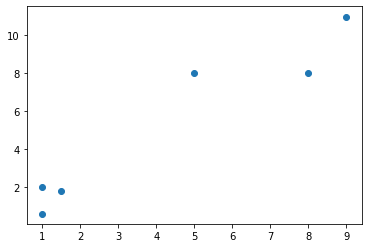

In [3]:
plt.scatter(x[ : , 0] , x[ : , 1])
plt.show()

In [4]:
from sklearn.cluster import KMeans

In [5]:
## by default n_cluster  ==== >>> 8
k_means = KMeans(n_clusters = 3)

In [6]:
k_means.fit(x)
### precompute_distance == >> basically cal all the pair of distances on 
### hand so that it will cal it again and again 

## init == >> k-means++ == >> it is an algorithm to pick first k cluster 

## n_init = 10 === >> how many time we want to reintialize the cluster
## we can pass the initial mean values in this argument

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [7]:
k_means.labels_ ## which point went to which cluster

array([0, 0, 1, 1, 0, 2])

In [8]:
k_means.cluster_centers_

array([[ 1.16666667,  1.46666667],
       [ 6.5       ,  8.        ],
       [ 9.        , 11.        ]])

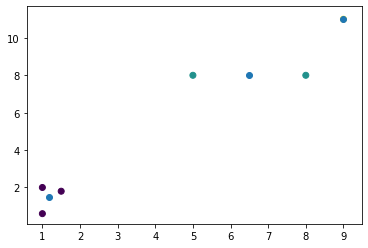

In [9]:
plt.scatter(x[ : , 0] , x[ : , 1] , c = k_means.labels_)
plt.scatter(k_means.cluster_centers_[ : , 0] , k_means.cluster_centers_[ : , 1])
plt.show()
## if we pass an array to color then it will deicde the color 
## corresponding to the val

### 2) Starter Code for KMeans

In [10]:
def fit(data , k = 2 , max_iter = 100):
    means = []
    # randomly initialize the means
    for i in range(k):
        means.append(data[i])
    
    for i in range(max_iter):
        # assign the data points to the cluster that they belong to 
        ## create empty clusters
        clusters = []
        for j in range(k):
            clusters.append([])
        for point in data:
            ### find the distance to all the mean values 
            distances = [((point - m) ** 2).sum() for m in means]
            ### find the min distance 
            minDistance = min(distances)
            ### find the mean for which we got the minimum distance === >> l
            l = distances.index(minDistance)
            ### add this point to cluster l
            clusters[l].append(point)
        
        # calculate the new mean values
        change = False
        for j in range(k):
            new_mean = np.average(clusters[j] , axis = 0)
            if not np.array_equal(means[j] , new_mean):
                change = True
            means[j] = new_mean
        if not change :
            break
    return means

In [11]:
def predict(data , means):
    predictions = []
    for point in data:
        distances = [((point - m) ** 2).sum() for m in means]
        minDistance = min(distances)
        l = distances.index(minDistance)
        predictions.append(l)
    return predictions

In [12]:
means = fit(x)

In [13]:
predict(x , means)

[0, 0, 1, 1, 0, 1]

### 3) Implementing KMeans Class

In [14]:
class K_Means:
    
    means = []
    k = 2
    max_iter = 100
    
    def __init__(self , k = 2 , max_iter = 100):
        print("Hey i am constructor")
        self.k = k
        self.max_iter = max_iter
    
    
    def fit(self , data):
        # randomly initialize the means
        for i in range(self.k):
            self.means.append(data[i])

        for i in range(self.max_iter):
            # assign the data points to the cluster that they belong to 
            ## create empty clusters
            clusters = []
            for j in range(self.k):
                clusters.append([])
            for point in data:
                ### find the distance to all the mean values 
                distances = [((point - m) ** 2).sum() for m in self.means]
                ### find the min distance 
                minDistance = min(distances)
                ### find the mean for which we got the minimum distance === >> l
                l = distances.index(minDistance)
                ### add this point to cluster l
                clusters[l].append(point)

            # calculate the new mean values
            change = False
            for j in range(self.k):
                new_mean = np.average(clusters[j] , axis = 0)
                if not np.array_equal(self.means[j] , new_mean):
                    change = True
                self.means[j] = new_mean
            if not change :
                break
        return 
    
    def predict(self , data):
        predictions = []
        for point in data:
            distances = [((point - m) ** 2).sum() for m in self.means]
            minDistance = min(distances)
            l = distances.index(minDistance)
            predictions.append(l)
        return predictions


In [15]:
kmeans = K_Means()

Hey i am constructor


In [16]:
kmeans.fit(x)

In [17]:
kmeans.predict(x)

[0, 0, 1, 1, 0, 1]

In [18]:
kmeans.means

[array([1.16666667, 1.46666667]), array([7.33333333, 9.        ])]